In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
start_date = "2012-01-01"
end_date = "2023-04-30"

In [4]:
tickers = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "BHARTIARTL.NS", "ICICIBANK.NS",
          "SBIN.NS", "INFY.NS", "ITC.NS", "ADANIENT.NS", "TATAMOTORS.NS" , "^NSEI"]

stocks_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)["Adj Close"]
    stocks_df[ticker] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
print('Total Number of stocks : {}'.format(len(stocks_df.columns[0:])))

Total Number of stocks : 11


In [6]:
stocks_df

RELIANCE.NS       TCS.NS  HDFCBANK.NS  BHARTIARTL.NS  \
Date                                                               
2012-01-02   294.166168   460.627380   192.628967     292.015564   
2012-01-03   301.701965   468.052917   198.179718     303.745270   
2012-01-04   298.163086   458.438629   200.052521     293.328217   
2012-01-05   291.230927   458.047699   200.210480     291.676758   
2012-01-06   298.746002   457.031555   204.565308     279.947021   
...                 ...          ...          ...            ...   
2023-04-24  2168.772217  3098.099854  1646.525879     756.773804   
2023-04-25  2185.373535  3099.270752  1623.117676     769.067322   
2023-04-26  2172.543213  3120.885742  1630.579102     769.913452   
2023-04-27  2186.293457  3110.932129  1639.552246     782.903748   
2023-04-28  2226.256592  3141.475830  1645.989380     795.645203   

            ICICIBANK.NS     SBIN.NS      INFY.NS      ITC.NS  ADANIENT.NS  \
Date                                                                         
2012-01-02    110.329239  140.477158   267.309631   95.099281    37.330639   
2012-01-03    114.962257  147.209061   272.576904   95.913109    37.162510   
2012-01-04    117.702461  146.380508   271.634766   95.530136    35.972691   
2012-01-05    118.494453  146.069809   270.278809   95.649826    34.543610   
2012-01-06    119.064659  144.369598   269.517365   96.750900    34.731129   
...                  ...         ...          ...         ...          ...   
2023-04-24    897.363525  535.055481  1187.879272  393.341339  1799.597168   
2023-04-25    905.992493  542.001709  1186.523071  396.084259  1842.191406   
2023-04-26    907.480286  546.391357  1189.090088  396.757965  1845.487183   
2023-04-27    910.852478  544.847778  1207.204102  400.367035  1850.630493   
2023-04-28    910.158203  557.920227  1213.500488  409.558136  1922.436523   

            TATAMOTORS.NS         ^NSEI  
Date                                     
2012-01-02     175.647964           NaN  
2012-01-03     185.196640   4765.299805  
2012-01-04     192.119446   4749.649902  
2012-01-05     192.978821   4749.950195  
2012-01-06     194.411118   4754.100098  
...                   ...           ...  
2023-04-24     472.266205  17743.400391  
2023-04-25     470.626343  17769.250000  
2023-04-26     475.247650  17813.599609  
2023-04-27     478.626648  17915.050781  
2023-04-28     481.955994  18065.000000  

[2792 rows x 11 columns]

In [8]:
print('Stocks under consideration are:')

for i in stocks_df.columns[0:]:
  print(i)

Stocks under consideration are:
RELIANCE.NS
TCS.NS
HDFCBANK.NS
BHARTIARTL.NS
ICICIBANK.NS
SBIN.NS
INFY.NS
ITC.NS
ADANIENT.NS
TATAMOTORS.NS
^NSEI


In [10]:
print('List of Stocks with minimum standard deviation are:')
stocks_df.std().sort_values(ascending=True)

List of Stocks with minimum standard deviation are:


ITC.NS             50.928132
SBIN.NS           108.769512
TATAMOTORS.NS     125.198055
BHARTIARTL.NS     162.266202
ICICIBANK.NS      215.311720
HDFCBANK.NS       437.483137
INFY.NS           445.469333
RELIANCE.NS       718.193753
ADANIENT.NS       884.377145
TCS.NS            937.436810
^NSEI            3867.075564
dtype: float64

In [11]:
stocks_df.isnull().sum()

RELIANCE.NS       0
TCS.NS            0
HDFCBANK.NS       0
BHARTIARTL.NS     0
ICICIBANK.NS      0
SBIN.NS           0
INFY.NS           0
ITC.NS            0
ADANIENT.NS       0
TATAMOTORS.NS     0
^NSEI            16
dtype: int64

In [15]:
stocks_df=stocks_df.dropna()

In [16]:
stocks_df.isnull().sum()

RELIANCE.NS      0
TCS.NS           0
HDFCBANK.NS      0
BHARTIARTL.NS    0
ICICIBANK.NS     0
SBIN.NS          0
INFY.NS          0
ITC.NS           0
ADANIENT.NS      0
TATAMOTORS.NS    0
^NSEI            0
dtype: int64

In [17]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2776 entries, 2012-01-03 to 2023-04-28
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RELIANCE.NS    2776 non-null   float64
 1   TCS.NS         2776 non-null   float64
 2   HDFCBANK.NS    2776 non-null   float64
 3   BHARTIARTL.NS  2776 non-null   float64
 4   ICICIBANK.NS   2776 non-null   float64
 5   SBIN.NS        2776 non-null   float64
 6   INFY.NS        2776 non-null   float64
 7   ITC.NS         2776 non-null   float64
 8   ADANIENT.NS    2776 non-null   float64
 9   TATAMOTORS.NS  2776 non-null   float64
 10  ^NSEI          2776 non-null   float64
dtypes: float64(11)
memory usage: 260.2 KB


In [22]:
def show_plot(df, fig_title):
  df.plot(figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

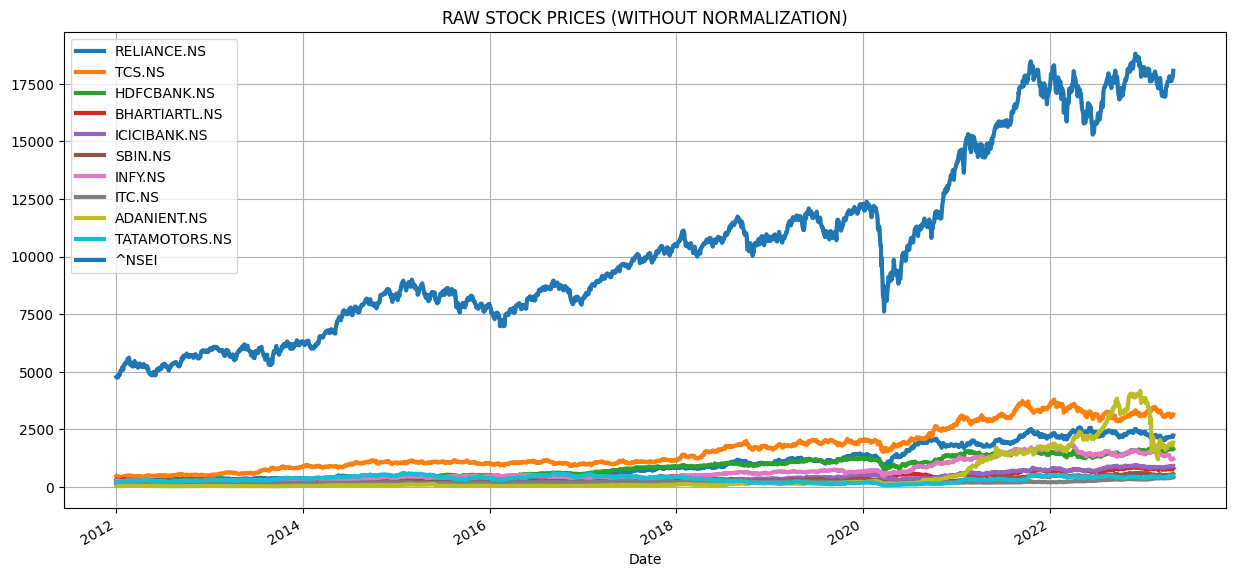

In [23]:
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [24]:
def normalize(df):
  x = df.copy()
  for i in x.columns[0:]:
    x[i] = x[i]/x[i][0]
  return x

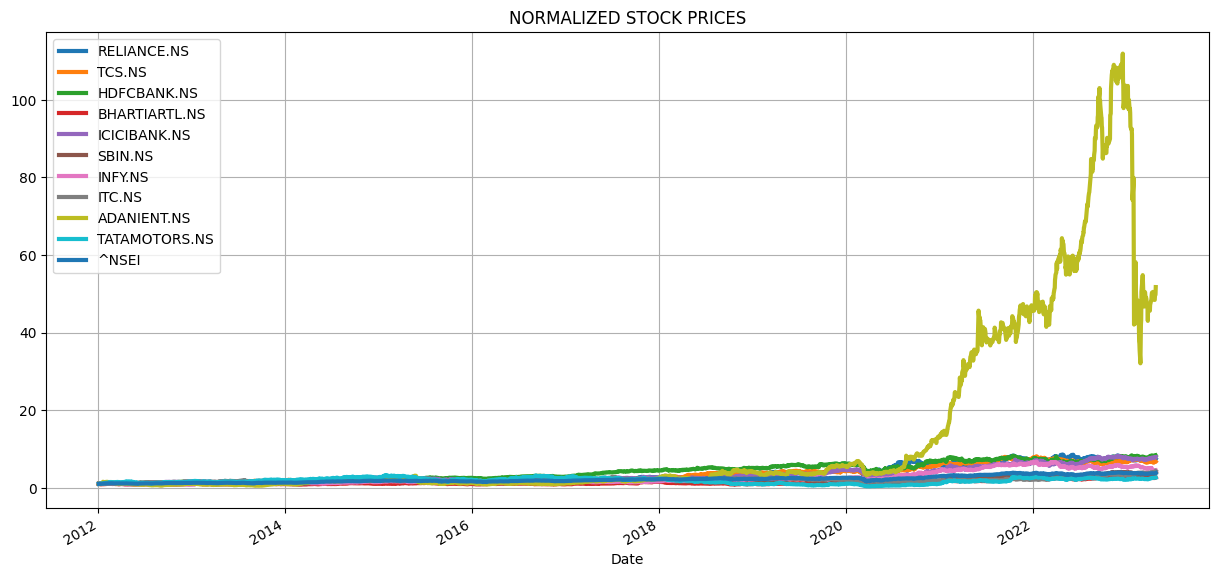

In [25]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [27]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  for i in df.columns[0:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)

  fig.show()

In [28]:
interactive_plot(stocks_df, 'Prices')

In [29]:
interactive_plot(normalize(stocks_df), 'Normalized Prices')

In [33]:
df = stocks_df['^NSEI']
df_daily_return = df.copy()

for j in range(1, len(df)):
  df_daily_return[j] = ((df[j]- df[j-1])/df[j-1]) * 100

df_daily_return[0] = 0
df_daily_return

Date
2012-01-03    0.000000
2012-01-04   -0.328414
2012-01-05    0.006322
2012-01-06    0.087367
2012-01-09   -0.237696
                ...   
2023-04-24    0.677197
2023-04-25    0.145686
2023-04-26    0.249586
2023-04-27    0.569515
2023-04-28    0.837001
Name: ^NSEI, Length: 2776, dtype: float64

In [34]:
def daily_return(df):
  df_daily_return = df.copy()

  for i in df.columns[0:]:
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [35]:
stocks_daily_return = daily_return(stocks_df)

In [36]:
stocks_daily_return

RELIANCE.NS    TCS.NS  HDFCBANK.NS  BHARTIARTL.NS  ICICIBANK.NS  \
Date                                                                          
2012-01-03     0.000000  0.000000     0.000000       0.000000      0.000000   
2012-01-04    -1.172972 -2.054103     0.945002      -3.429536      2.383568   
2012-01-05    -2.324956 -0.085274     0.078959      -0.563007      0.672876   
2012-01-06     2.580452 -0.221842     2.175125      -4.021485      0.481209   
2012-01-09    -1.574820  0.166807     0.529456      -3.055508     -0.518818   
...                 ...       ...          ...            ...           ...   
2023-04-24     0.383145  0.441331     0.809143      -0.646890      2.156604   
2023-04-25     0.765471  0.037794    -1.421672       1.624464      0.961591   
2023-04-26    -0.587100  0.697422     0.459697       0.110020      0.164217   
2023-04-27     0.632910 -0.318936     0.550304       1.687241      0.371600   
2023-04-28     1.827894  0.981818     0.392615       1.627461     -0.076223   

             SBIN.NS   INFY.NS    ITC.NS  ADANIENT.NS  TATAMOTORS.NS     ^NSEI  
Date                                                                            
2012-01-03  0.000000  0.000000  0.000000     0.000000       0.000000  0.000000  
2012-01-04 -0.562841 -0.345641 -0.399291    -3.201666       3.738084 -0.328414  
2012-01-05 -0.212255 -0.499184  0.125290    -3.972683       0.447313  0.006322  
2012-01-06 -1.163971 -0.281725  1.151151     0.542847       0.742204  0.087367  
2012-01-09 -2.122264  0.155386 -0.049466    -0.279278      -1.473472 -0.237696  
...              ...       ...       ...          ...            ...       ...  
2023-04-24  2.108064 -0.085549  0.110223    -0.058234       0.848898  0.677197  
2023-04-25  1.298226 -0.114170  0.697338     2.366876      -0.347233  0.145686  
2023-04-26  0.809896  0.216348  0.170092     0.178905       0.981948  0.249586  
2023-04-27 -0.282504  1.523351  0.909640     0.278697       0.710997  0.569515  
2023-04-28  2.399285  0.521568  2.295669     3.880085       0.695604  0.837001  

[2776 rows x 11 columns]

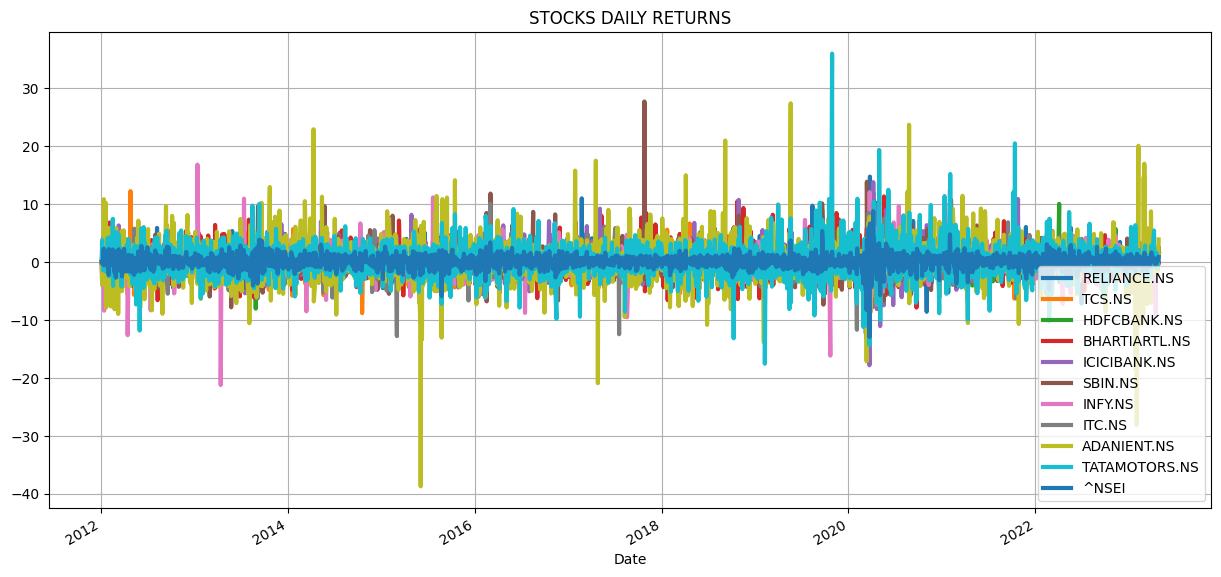

In [37]:
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [38]:
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [39]:
cm = stocks_daily_return.corr()

<Axes: >

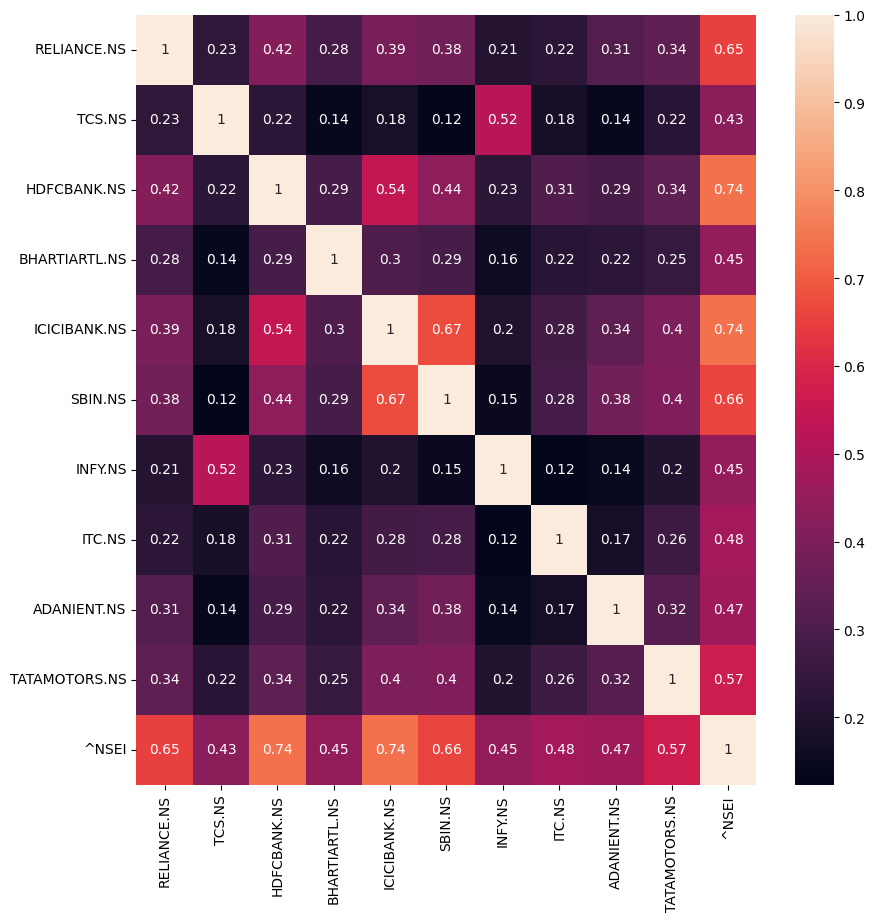

In [40]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

array([[<Axes: title={'center': 'RELIANCE.NS'}>,
        <Axes: title={'center': 'TCS.NS'}>,
        <Axes: title={'center': 'HDFCBANK.NS'}>],
       [<Axes: title={'center': 'BHARTIARTL.NS'}>,
        <Axes: title={'center': 'ICICIBANK.NS'}>,
        <Axes: title={'center': 'SBIN.NS'}>],
       [<Axes: title={'center': 'INFY.NS'}>,
        <Axes: title={'center': 'ITC.NS'}>,
        <Axes: title={'center': 'ADANIENT.NS'}>],
       [<Axes: title={'center': 'TATAMOTORS.NS'}>,
        <Axes: title={'center': '^NSEI'}>, <Axes: >]], dtype=object)

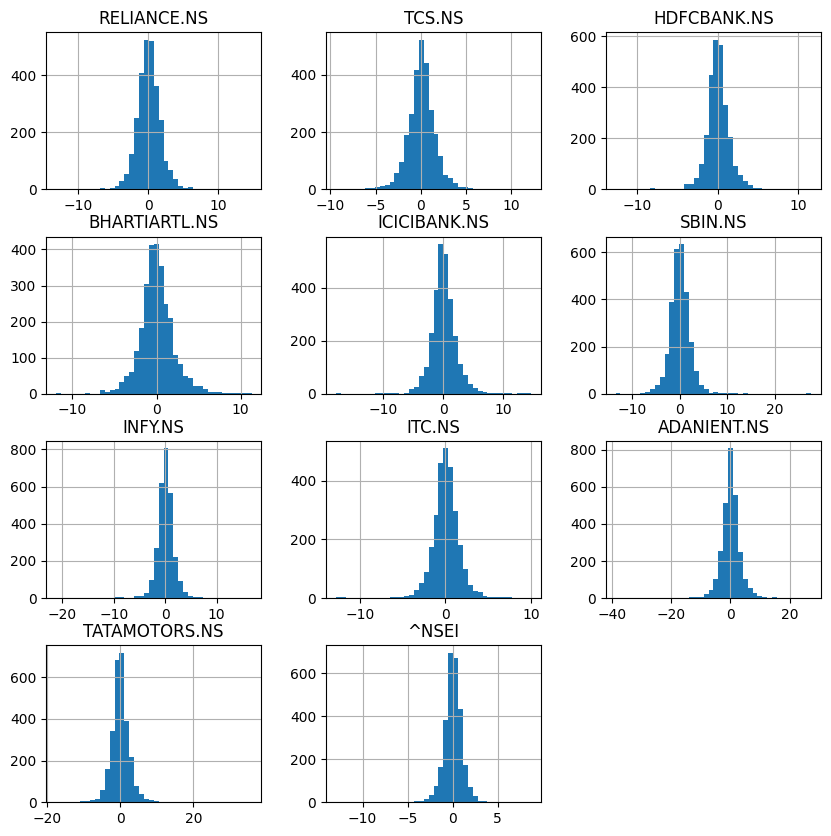

In [41]:
stocks_daily_return.hist(figsize=(10, 10), bins = 40)

In [42]:
df_hist = stocks_daily_return.copy()
data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([ 0.        , -1.17297194, -2.32495562, ..., -0.58709974,
         0.63291004,  1.82789436]),
 array([ 0.        , -2.05410285, -0.08527427, ...,  0.69742181,
        -0.31893552,  0.98181831]),
 array([0.        , 0.94500222, 0.07895876, ..., 0.45969716, 0.55030415,
        0.39261535]),
 array([ 0.        , -3.42953595, -0.56300712, ...,  0.11002033,
         1.687241  ,  1.62746125]),
 array([ 0.        ,  2.38356824,  0.67287649, ...,  0.16421692,
         0.37159952, -0.07622254]),
 array([ 0.        , -0.56284052, -0.21225467, ...,  0.80989568,
        -0.2825043 ,  2.39928458]),
 array([ 0.        , -0.34564142, -0.49918391, ...,  0.2163478 ,
         1.52335083,  0.5215677 ]),
 array([ 0.        , -0.39929132,  0.12529024, ...,  0.1700916 ,
         0.90964017,  2.29566879]),
 array([ 0.        , -3.20166571, -3.972683  , ...,  0.17890521,
         0.27869663,  3.88008468]),
 array([0.        , 3.7380839 , 0.44731287, ..., 0.9819483 , 0.71099727,
        0.69560392]),
 a

In [43]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()